In [93]:
import matplotlib.pyplot as plt      #시각화를 위한 설치
import matplotlib.font_manager as fm    # 한글 폰트
import matplotlib                   #시각화를 위한 설치
import os, warnings  
import pandas as pd                #구조 변경 및 결합을 하기 위한 설치
import seaborn as sns              #시각화를 위한 설치
import plotly.express as px        #시각화를 위한 설치

warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)         #모든 행을 다 보여주라는 명령
pd.set_option('display.max_columns', None)      #모든 열을 다 보여주라는 명령

In [94]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False
## 한글 폰트 적용 ( 안하면 한글 깨짐 )
f_name = fm.FontProperties(fname="C:/Windows/Fonts/malgunbd.ttf").get_name()
plt.rc('font', family=f_name)

In [95]:
all= pd.read_csv('all.csv')

In [96]:
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ACCOUNTDATE  119 non-null    object
 1   CNT          119 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


<AxesSubplot:>

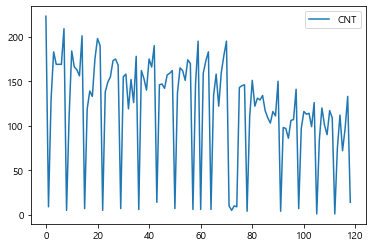

In [97]:
all.plot()

In [68]:
all

,ACCOUNTDATE,CNT
0,2018-04-30,223
1,2018-04-29,9
2,2018-04-28,130
3,2018-04-27,183
4,2018-04-26,169
5,2018-04-25,169
6,2018-04-24,169
7,2018-04-23,209
8,2018-04-22,5
9,2018-04-21,111


### 명절이라는 이상치를 제거 하고 시작.

In [98]:
all=all.drop([118,72,73,74,60])

In [99]:
train=all[(all['ACCOUNTDATE']>='2018-01-02')&(all['ACCOUNTDATE']<='2018-03-30')]
test=all[(all['ACCOUNTDATE']>='2018-04-02')&(all['ACCOUNTDATE']<='2018-04-30')]

In [71]:
train['ACCOUNTDATE']=train['ACCOUNTDATE'].astype('str')
train['ACCOUNTDATE']=pd.to_datetime(train['ACCOUNTDATE'])
train.index=train['ACCOUNTDATE']
train.set_index('ACCOUNTDATE',inplace=True)

In [72]:
train

,CNT
ACCOUNTDATE,
2018-03-30,158
2018-03-29,119
2018-03-28,152
2018-03-27,126
2018-03-26,178
2018-03-25,6
2018-03-24,162
2018-03-23,153
2018-03-22,140


<AxesSubplot:xlabel='ACCOUNTDATE'>

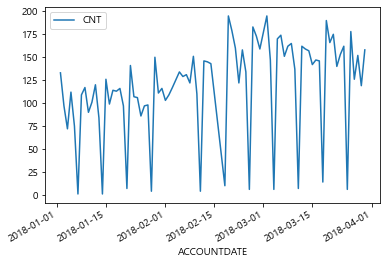

In [73]:
train.plot()

In [74]:
# AD-Fuller Test : 시계열의 정상성(stationary) 한지 확인

from statsmodels.tsa.stattools import adfuller

""" 차분 방법 """
train_diff =train - train.shift(1)
print(train)

y = train.dropna()
y1diff =train_diff.dropna()
result = adfuller(y)
print(f'원 데이터 ADF Statistic: {result[0]:.3f}')
print(f'원 데이터 p-value: {result[1]:.3f}')
result = adfuller(y1diff)
print(f'1차 차분 ADF Statistic: {result[0]:.3f}')
print(f'1차 차분 p-value: {result[1]:.3f}')

             CNT
ACCOUNTDATE     
2018-03-30   158
2018-03-29   119
2018-03-28   152
2018-03-27   126
2018-03-26   178
2018-03-25     6
2018-03-24   162
2018-03-23   153
2018-03-22   140
2018-03-21   175
2018-03-20   166
2018-03-19   190
2018-03-18    14
2018-03-17   146
2018-03-16   147
2018-03-15   142
2018-03-14   157
2018-03-13   159
2018-03-12   162
2018-03-11     7
2018-03-10   137
2018-03-09   165
2018-03-08   162
2018-03-07   151
2018-03-06   174
2018-03-05   170
2018-03-04     6
2018-03-03   147
2018-03-02   195
2018-02-28   159
2018-02-27   173
2018-02-26   183
2018-02-25     6
2018-02-24   134
2018-02-23   158
2018-02-22   122
2018-02-21   160
2018-02-20   179
2018-02-19   195
2018-02-18    10
2018-02-14   143
2018-02-13   145
2018-02-12   146
2018-02-11     4
2018-02-10   110
2018-02-09   151
2018-02-08   122
2018-02-07   131
2018-02-06   129
2018-02-05   134
2018-02-03   117
2018-02-02   109
2018-02-01   103
2018-01-31   116
2018-01-30   111
2018-01-29   150
2018-01-28    

In [75]:
import itertools
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [76]:
import warnings
warnings.filterwarnings('ignore')

for param in pdq:
    try:
        model_arima=ARIMA(train.CNT.values, order=param)
        model_arima_fit=model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 894.7239710636949
(0, 0, 1) 896.7040514148812
(0, 0, 2) 898.6348465061253
(0, 0, 3) 900.1703640862986
(0, 0, 4) 898.434545349229
(0, 1, 0) 942.709692995849
(0, 1, 1) 880.4344738082414
(0, 1, 2) 879.1019982855307
(0, 1, 3) 876.6626087684314
(0, 1, 4) 873.8522348593316
(0, 2, 0) 1020.3919842133591
(0, 2, 1) 938.6421032960072
(0, 2, 2) 881.5434313043806
(0, 2, 3) 880.9120566983261
(0, 2, 4) 876.0643145736292
(1, 0, 0) 896.7053901163611
(1, 0, 1) 898.7239711022814
(1, 0, 2) 895.4685338614571
(1, 0, 3) 902.6323453999762
(1, 0, 4) 886.8131662866139
(1, 1, 0) 922.5664826240402
(1, 1, 1) 880.5591306258877
(1, 2, 0) 980.045062420777
(1, 2, 3) 881.643486737192
(1, 2, 4) 877.1124999168471
(2, 0, 0) 898.6042363731812
(2, 0, 1) 900.54508954937
(2, 0, 3) 1251.6032458598859
(2, 0, 4) 888.107418349746
(2, 1, 0) 910.1130374935276
(2, 1, 1) 878.972371081442
(2, 1, 2) 878.3330975183229
(2, 2, 0) 957.752156383943
(2, 2, 1) 907.9458114189947
(2, 2, 4) 881.3235938632149
(3, 0, 0) 900.0985679852183

In [81]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

#(ar=2,차분=1, ma=3)파라미터로 arima모델을 학습
model=ARIMA(train['CNT'], order=(4,1,2))
model_fit=model.fit(trend='nc',full_output=True,disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.CNT   No. Observations:                   82
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -432.867
Method:                       css-mle   S.D. of innovations             45.974
Date:                Mon, 25 Oct 2021   AIC                            879.733
Time:                        10:17:49   BIC                            896.581
Sample:                             1   HQIC                           886.497
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ar.L1.D.CNT    -1.1421      0.114    -10.052      0.000      -1.365      -0.919
ar.L2.D.CNT    -0.5010      0.175     -2.861      0.004      -0.844      -0.158
ar.L3.D.CNT    -0.3877      0.171     -2.261    

<AxesSubplot:xlabel='ACCOUNTDATE'>

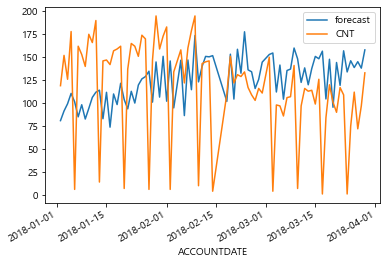

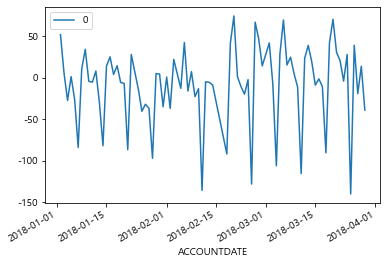

In [82]:
fig=model_fit.plot_predict()
residuals=pd.DataFrame(model_fit.resid)
residuals.plot()

In [83]:
test

,ACCOUNTDATE,CNT
0,2018-04-30,223
1,2018-04-29,9
2,2018-04-28,130
3,2018-04-27,183
4,2018-04-26,169
5,2018-04-25,169
6,2018-04-24,169
7,2018-04-23,209
8,2018-04-22,5
9,2018-04-21,111


In [88]:
forecast_data=model_fit.forecast(steps=30) 

pred_y=forecast_data[0].tolist()
test_y=test.CNT.values 

In [89]:
pred_y 

[88.02721220752989,
 75.68787557337106,
 92.48617766144199,
 88.46521939654548,
 99.98515975672832,
 85.2272708987512,
 93.92548074824249,
 87.86297122489104,
 93.44571767646859,
 90.19996858451253,
 91.41794984203507,
 90.91217481234308,
 90.8270875486353,
 91.46759343652522,
 90.68877913398552,
 91.40912520290664,
 90.74825938891652,
 91.29369004140486,
 90.9054437841611,
 91.16266941113817,
 91.00712048711851,
 91.07835134803183,
 91.06636816746494,
 91.04427322089232,
 91.08442055886677,
 91.03755748281483,
 91.08234625405785,
 91.04429432371418,
 91.07405600724752,
 91.05276864461665]

In [90]:
test_y

array([223,   9, 130, 183, 169, 169, 169, 209,   5, 111, 184, 166, 163,
       156, 201,   7, 119, 139, 133, 175, 198, 190,   5, 138, 149, 155,
       173, 175, 168], dtype=int64)

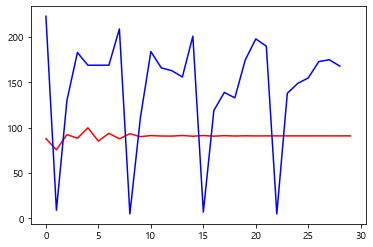

In [91]:
plt.plot(pred_y,color='red') #에측값
plt.plot(test_y,color='blue') #실제값

# --------------------------------------------------------------------------------------------------------------

In [100]:
from fbprophet import Prophet

In [101]:
train.columns=['ds','y']
test.columns=['ds','y']

In [102]:
prophet = Prophet(seasonality_mode = 'multiplicative',
                 daily_seasonality=True,
                 changepoint_prior_scale=0.5)
prophet.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [103]:
future_data = prophet.make_future_dataframe(periods = 21, freq = 'd')
forecast_data = prophet.predict(future_data)
a=forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(21)

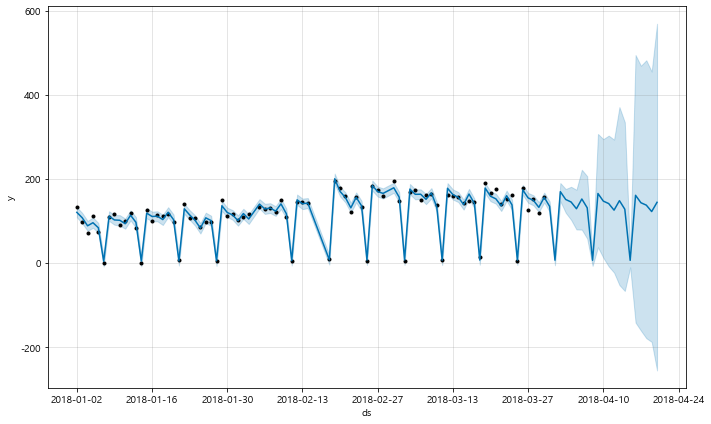

In [104]:
fig1=prophet.plot(forecast_data)

In [105]:
pred_y=a.yhat.values[0:21]
test_y=test.y.values[0:21]

In [106]:
pred_y #2020년도의 에측값

array([134.85628591,   6.94762105, 169.7390718 , 151.14532206,
       145.19496441, 129.15209896, 152.33431182, 131.44126246,
         6.77104468, 165.4093701 , 147.27580895, 141.46414322,
       125.82127663, 148.39109417, 128.02623902,   6.59446831,
       161.0796684 , 143.40629584, 137.73332203, 122.49045429,
       144.44787652])

In [107]:
test_y #2020년도의 실제값

array([223,   9, 130, 183, 169, 169, 169, 209,   5, 111, 184, 166, 163,
       156, 201,   7, 119, 139, 133, 175, 198], dtype=int64)

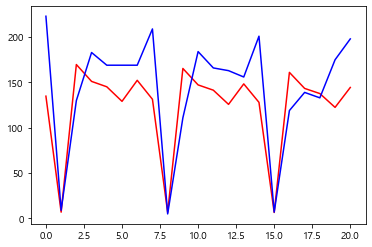

In [108]:
plt.plot(pred_y,color='red') #에측값
plt.plot(test_y,color='blue') #실제값

In [109]:
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
rmse=sqrt(mean_squared_error(pred_y,test_y))
print(rmse)

42.50062026800979
